In [2]:
import cv2
import os
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt

In [3]:
mp_holistic=mp.solutions.holistic #Holistic model for downloading the model
mp_drawing=mp.solutions.drawing_utils #Drawing utilities for drawing

In [4]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #color convertion brg2rgb
    image.flags.writeable=False #image is no longer writiable
    results=model.process(image) #make prediction
    image.flags.writeable=True #image is now writiable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #color convertion rgb2brg
    return image,results

In [5]:
type(results.face_landmarks)

NameError: name 'results' is not defined

In [5]:
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS)     #draw face connections so mp_holistic.allconnection are immutable
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)      #pose con
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #left hand conn
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)#rigth hand conn

In [6]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1))     
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,44,121),thickness=1,circle_radius=1))      
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=1)) 
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=1,circle_radius=1),
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=1,circle_radius=1))

In [7]:
cap=cv2.VideoCapture(0)
# access mediapipe model ;min detection confid is initial detection and min tracking confidence if tracking  
with mp_holistic.Holistic(min_detection_confidence=0.45, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # read fead
        ret,frame=cap.read()
        frame=cv2.resize(frame,(900,500))
        #make detections and results are in mediapipe
        image,results=mediapipe_detection(frame,holistic)
        print(results)
        #draw landmarks
        draw_styled_landmarks(image,results)
        #show to the screen
        cv2.imshow('video cam',image)
        #beake gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
#results has many differenttype of landmarks each defies a perticular key element

In [8]:
#frame

In [9]:
#draw_landmarks(frame,results)

In [10]:
#plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [11]:
#plt.imshow(frame)

In [12]:
#mp_drawing.draw_landmarks??

In [13]:
                                          #Extracting key points

In [14]:
#len(results.pose_landmarks.landmark)
#results.pose_landmarks

In [15]:
#pose=[]
#for res in results.pose_landmarks.landmark:
    #test=np.array([res.x,res.y,res.z,res.visibility])
    #pose.append(test)
#same thing in list comprehension

In [16]:
#if results dont see a landmarks it throws an error so we have to error handel

In [17]:
#pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [18]:
# lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [19]:
# rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
# face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [21]:
#test

In [22]:
#face.shape

In [8]:
pose1 = []
for res in results.face_landmarks.landmark:
    test = np.array([res.x, res.y, res.z])
    pose1.append(test)

In [9]:
pose1

[array([ 0.60418159,  0.32807592, -0.03223212]),
 array([ 0.603921  ,  0.28775918, -0.0411786 ]),
 array([ 0.6028592 ,  0.30574897, -0.02671942]),
 array([ 0.59377086,  0.26154351, -0.02389889]),
 array([ 0.60339278,  0.27679351, -0.04152498]),
 array([ 0.6019811 ,  0.26593798, -0.03545352]),
 array([ 0.59803665,  0.24339545, -0.00617922]),
 array([0.53869802, 0.26698801, 0.01875878]),
 array([0.59591848, 0.22279917, 0.00597744]),
 array([0.59503484, 0.20811117, 0.00891016]),
 array([0.59091461, 0.15971655, 0.03185814]),
 array([ 0.60433197,  0.33338976, -0.03211813]),
 array([ 0.60437346,  0.33859217, -0.03047048]),
 array([ 0.60412246,  0.34176448, -0.02797548]),
 array([ 0.60465229,  0.34379089, -0.02986862]),
 array([ 0.60500157,  0.34658703, -0.03219594]),
 array([ 0.60533088,  0.35144928, -0.03567455]),
 array([ 0.60552365,  0.35841334, -0.03706504]),
 array([ 0.60593784,  0.37838519, -0.0342703 ]),
 array([ 0.60367918,  0.29558885, -0.03859351]),
 array([ 0.59503853,  0.30009833

In [11]:
np.shape(np.array(pose1))

(468, 3)

In [23]:
#rh

In [10]:
def exract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose,face,lh,rh])

In [13]:
result=exract_keypoints(results)

In [14]:
result

array([ 0.59637254,  0.33136532, -0.37353769, ...,  0.        ,
        0.        ,  0.        ])

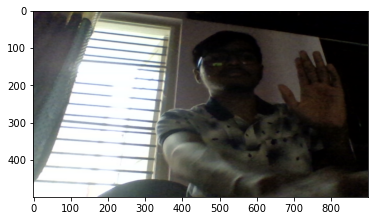

In [15]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [25]:
                                #setting up folders for collections

In [22]:
#path for exported data
DATA_PATH=os.path.join('MP_Data')

#actions that we try to detect
actions=np.array(['hello','thanks','iloveyou'])

#thirty video worth of data
no_sequences=30
#videos are going to be 30 frames in length
sequence_length=30

In [27]:
#creating for all actions
#hello
#sub folders
    ##0,
    ##1,
    #.....
    #30
#thanks


#iloveyou

In [ ]:
DATA_PATH

In [12]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass

In [15]:
##collecting keypoints and training and testing

In [34]:
cv2.LINE_AA??

In [28]:
cap=cv2.VideoCapture(0)
# access mediapipe model ;min detection confid is initial detection and min tracking confidence if tracking  
with mp_holistic.Holistic(min_detection_confidence=0.45, min_tracking_confidence=0.5) as holistic:
    #loop through sequence and actions
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                # read fead
                ret,frame=cap.read()
                #make detections and results are in mediapipe
                image,results=mediapipe_detection(frame,holistic)
                print(results)
                #draw landmarks
                draw_styled_landmarks(image,results)
                
                #apply collection wait logic
                if frame_num==0:
                    cv2.putText(image,"Starting collection",(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA)
                
                    cv2.putText(image,"Collecting Frames for {} video no {}".format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA)
                    
                    cv2.waitKey(2000)
                else:
                     cv2.putText(image,"Collecting Frames for {} video no {}".format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,0),1,cv2.LINE_AA) 
                     
                keypoints=exract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                #show to the screen
                cv2.imshow('video cam',image)
                #beake gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
cap.release()
cv2.destroyAllWindows()

### training split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from tensorflow.keras.utils import to_categorical

In [23]:
lable_map={}
i=0
for action in actions: 
    lable_map.update({action:i})
    i+=1

In [24]:
lable_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(lable_map[action])


In [36]:
np.array(sequences).shape

(90, 30, 1662)

In [40]:
np.array(labels).shape

(90,)

In [44]:
labels[30]

1

In [30]:
x=np.array(sequences)

In [31]:
x.shape

(90, 30, 1662)

In [32]:
y=to_categorical(labels).astype(int)

In [33]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [35]:
X_train.shape

(85, 30, 1662)

In [36]:
y_test.shape

(5, 3)

# models

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [17]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [38]:
res=[.2,.7,.1]

In [39]:
actions[np.argmax(res)]

'thanks'

In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [41]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 74ms/step - loss: 1.0785 - categorical_accuracy: 0.3176
Epoch 2/2000
3/3 [==============================] - 0s 68ms/step - loss: 5.3950 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.3302 - categorical_accuracy: 0.4118
Epoch 4/2000
3/3 [==============================] - 0s 67ms/step - loss: 2.7226 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.1405 - categorical_accuracy: 0.3294
Epoch 6/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.9745 - categorical_accuracy: 0.3882
Epoch 7/2000
3/3 [==============================] - 0s 76ms/step - loss: 10.5242 - categorical_accuracy: 0.3765
Epoch 8/2000
3/3 [==============================] - 0s 72ms/step - loss: 16.0626 - categorical_accuracy: 0.2941
Epoch 9/2000
3/3 [==============================] - 0s 74ms/step - loss: 24.9331 - categorical_accuracy: 0.270

3/3 [==============================] - 0s 71ms/step - loss: 0.4543 - categorical_accuracy: 0.9176
Epoch 75/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.5098 - categorical_accuracy: 0.8118
Epoch 76/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.5240 - categorical_accuracy: 0.8353
Epoch 77/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.5033 - categorical_accuracy: 0.8353
Epoch 78/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.4047 - categorical_accuracy: 0.9059
Epoch 79/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.3919 - categorical_accuracy: 0.9176
Epoch 80/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3722 - categorical_accuracy: 0.8941
Epoch 81/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4676 - categorical_accuracy: 0.8353
Epoch 82/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.3911 - categorical_accuracy: 0.9176
Epoch 

3/3 [==============================] - 0s 73ms/step - loss: 0.7520 - categorical_accuracy: 0.7294
Epoch 147/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.9277 - categorical_accuracy: 0.6235
Epoch 148/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.5510 - categorical_accuracy: 0.7765
Epoch 149/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.6808 - categorical_accuracy: 0.6118
Epoch 150/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.4580 - categorical_accuracy: 0.8000
Epoch 151/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.5214 - categorical_accuracy: 0.6706
Epoch 152/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.3647 - categorical_accuracy: 0.9176
Epoch 153/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.3524 - categorical_accuracy: 0.9294
Epoch 154/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.2455 - categorical_accuracy: 0.941

3/3 [==============================] - 0s 79ms/step - loss: 0.2034 - categorical_accuracy: 0.9412
Epoch 219/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1910 - categorical_accuracy: 0.9412
Epoch 220/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2002 - categorical_accuracy: 0.9412
Epoch 221/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1747 - categorical_accuracy: 0.9294
Epoch 222/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1787 - categorical_accuracy: 0.9529
Epoch 223/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1507 - categorical_accuracy: 0.9529
Epoch 224/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1356 - categorical_accuracy: 0.9647
Epoch 225/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.1353 - categorical_accuracy: 0.9765
Epoch 226/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.1422 - categorical_accuracy: 0.952

3/3 [==============================] - 0s 76ms/step - loss: 0.0768 - categorical_accuracy: 0.9647
Epoch 291/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1896 - categorical_accuracy: 0.9529
Epoch 292/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1164 - categorical_accuracy: 0.9529
Epoch 293/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0706 - categorical_accuracy: 0.9882
Epoch 294/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0955 - categorical_accuracy: 0.9647
Epoch 295/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0901 - categorical_accuracy: 0.9529
Epoch 296/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0822 - categorical_accuracy: 0.9647
Epoch 297/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.0653 - categorical_accuracy: 0.9647
Epoch 298/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0783 - categorical_accuracy: 0.964

3/3 [==============================] - 0s 74ms/step - loss: 0.1595 - categorical_accuracy: 0.9294
Epoch 363/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1190 - categorical_accuracy: 0.9529
Epoch 364/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1928 - categorical_accuracy: 0.9294
Epoch 365/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1462 - categorical_accuracy: 0.9529
Epoch 366/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1637 - categorical_accuracy: 0.9529
Epoch 367/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0859 - categorical_accuracy: 0.9647
Epoch 368/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1235 - categorical_accuracy: 0.9647
Epoch 369/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0779 - categorical_accuracy: 1.0000
Epoch 370/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0911 - categorical_accuracy: 0.952

3/3 [==============================] - 0s 83ms/step - loss: 0.0769 - categorical_accuracy: 0.9765
Epoch 435/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0593 - categorical_accuracy: 0.9765
Epoch 436/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0589 - categorical_accuracy: 0.9765
Epoch 437/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0738 - categorical_accuracy: 0.9765
Epoch 438/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0435 - categorical_accuracy: 0.9882
Epoch 439/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0509 - categorical_accuracy: 0.9765
Epoch 440/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0300 - categorical_accuracy: 0.9882
Epoch 441/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.0326 - categorical_accuracy: 0.9882
Epoch 442/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0289 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 71ms/step - loss: 0.8685 - categorical_accuracy: 0.8824
Epoch 507/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4379 - categorical_accuracy: 0.8941
Epoch 508/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.1911 - categorical_accuracy: 0.9294
Epoch 509/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.3867 - categorical_accuracy: 0.8824
Epoch 510/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.5069 - categorical_accuracy: 0.7882
Epoch 511/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.8652 - categorical_accuracy: 0.6471
Epoch 512/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.4960 - categorical_accuracy: 0.7882
Epoch 513/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.5705 - categorical_accuracy: 0.6471
Epoch 514/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.3881 - categorical_accuracy: 0.847

3/3 [==============================] - 0s 80ms/step - loss: 0.0201 - categorical_accuracy: 0.9882
Epoch 579/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0118 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0161 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0218 - categorical_accuracy: 0.9882
Epoch 582/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.0059 - categorical_accuracy: 1.0000
Epoch 583/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0074 - categorical_accuracy: 1.0000
Epoch 584/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 585/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0114 - categorical_accuracy: 0.9882
Epoch 586/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0047 - categorical_accuracy: 1.000

Epoch 650/2000
3/3 [==============================] - 0s 75ms/step - loss: 5.0392e-04 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 73ms/step - loss: 5.0970e-04 - categorical_accuracy: 1.0000
Epoch 652/2000
3/3 [==============================] - 0s 72ms/step - loss: 4.8719e-04 - categorical_accuracy: 1.0000
Epoch 653/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.6805e-04 - categorical_accuracy: 1.0000
Epoch 654/2000
3/3 [==============================] - 0s 79ms/step - loss: 4.5008e-04 - categorical_accuracy: 1.0000
Epoch 655/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.3994e-04 - categorical_accuracy: 1.0000
Epoch 656/2000
3/3 [==============================] - 0s 71ms/step - loss: 4.2642e-04 - categorical_accuracy: 1.0000
Epoch 657/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.0246e-04 - categorical_accuracy: 1.0000
Epoch 658/2000
3/3 [==============================] - 0s 71ms/st

3/3 [==============================] - 0s 79ms/step - loss: 1.1009e-04 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0906e-04 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0786e-04 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0704e-04 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0604e-04 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0514e-04 - categorical_accuracy: 1.0000
Epoch 726/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0404e-04 - categorical_accuracy: 1.0000
Epoch 727/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0319e-04 - categorical_accuracy: 1.0000
Epoch 728/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.02

3/3 [==============================] - 0s 79ms/step - loss: 6.5552e-05 - categorical_accuracy: 1.0000
Epoch 791/2000
3/3 [==============================] - 0s 77ms/step - loss: 6.5313e-05 - categorical_accuracy: 1.0000
Epoch 792/2000
3/3 [==============================] - 0s 76ms/step - loss: 6.4833e-05 - categorical_accuracy: 1.0000
Epoch 793/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.4732e-05 - categorical_accuracy: 1.0000
Epoch 794/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.4051e-05 - categorical_accuracy: 1.0000
Epoch 795/2000
3/3 [==============================] - 0s 73ms/step - loss: 6.3676e-05 - categorical_accuracy: 1.0000
Epoch 796/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.3266e-05 - categorical_accuracy: 1.0000
Epoch 797/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.2884e-05 - categorical_accuracy: 1.0000
Epoch 798/2000
3/3 [==============================] - 0s 70ms/step - loss: 6.24

3/3 [==============================] - 0s 75ms/step - loss: 4.5152e-05 - categorical_accuracy: 1.0000
Epoch 861/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.4915e-05 - categorical_accuracy: 1.0000
Epoch 862/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.4765e-05 - categorical_accuracy: 1.0000
Epoch 863/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.4534e-05 - categorical_accuracy: 1.0000
Epoch 864/2000
3/3 [==============================] - 0s 71ms/step - loss: 4.4336e-05 - categorical_accuracy: 1.0000
Epoch 865/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.4111e-05 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.3948e-05 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 72ms/step - loss: 4.3696e-05 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 74ms/step - loss: 4.34

3/3 [==============================] - 0s 77ms/step - loss: 3.2916e-05 - categorical_accuracy: 1.0000
Epoch 931/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.2797e-05 - categorical_accuracy: 1.0000
Epoch 932/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.2706e-05 - categorical_accuracy: 1.0000
Epoch 933/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.2535e-05 - categorical_accuracy: 1.0000
Epoch 934/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.2415e-05 - categorical_accuracy: 1.0000
Epoch 935/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.2342e-05 - categorical_accuracy: 1.0000
Epoch 936/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.2147e-05 - categorical_accuracy: 1.0000
Epoch 937/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.2042e-05 - categorical_accuracy: 1.0000
Epoch 938/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.18

3/3 [==============================] - 0s 78ms/step - loss: 2.4476e-05 - categorical_accuracy: 1.0000
Epoch 1001/2000
3/3 [==============================] - 0s 72ms/step - loss: 2.4392e-05 - categorical_accuracy: 1.0000
Epoch 1002/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.4284e-05 - categorical_accuracy: 1.0000
Epoch 1003/2000
3/3 [==============================] - 0s 74ms/step - loss: 2.4186e-05 - categorical_accuracy: 1.0000
Epoch 1004/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.4072e-05 - categorical_accuracy: 1.0000
Epoch 1005/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.3984e-05 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.3865e-05 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.3770e-05 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 74ms/step - lo

3/3 [==============================] - 0s 80ms/step - loss: 1.8711e-05 - categorical_accuracy: 1.0000
Epoch 1070/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.8645e-05 - categorical_accuracy: 1.0000
Epoch 1071/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.8583e-05 - categorical_accuracy: 1.0000
Epoch 1072/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.8513e-05 - categorical_accuracy: 1.0000
Epoch 1073/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.8449e-05 - categorical_accuracy: 1.0000
Epoch 1074/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.8398e-05 - categorical_accuracy: 1.0000
Epoch 1075/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.8318e-05 - categorical_accuracy: 1.0000
Epoch 1076/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.8266e-05 - categorical_accuracy: 1.0000
Epoch 1077/2000
3/3 [==============================] - 0s 72ms/step - lo

3/3 [==============================] - 0s 71ms/step - loss: 1.4898e-05 - categorical_accuracy: 1.0000
Epoch 1139/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.4870e-05 - categorical_accuracy: 1.0000
Epoch 1140/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.4818e-05 - categorical_accuracy: 1.0000
Epoch 1141/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.4782e-05 - categorical_accuracy: 1.0000
Epoch 1142/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.4730e-05 - categorical_accuracy: 1.0000
Epoch 1143/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.4673e-05 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.4632e-05 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.4586e-05 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 74ms/step - lo

3/3 [==============================] - 0s 85ms/step - loss: 1.2158e-05 - categorical_accuracy: 1.0000
Epoch 1208/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.2128e-05 - categorical_accuracy: 1.0000
Epoch 1209/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.2092e-05 - categorical_accuracy: 1.0000
Epoch 1210/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.2057e-05 - categorical_accuracy: 1.0000
Epoch 1211/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.2025e-05 - categorical_accuracy: 1.0000
Epoch 1212/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1992e-05 - categorical_accuracy: 1.0000
Epoch 1213/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.1956e-05 - categorical_accuracy: 1.0000
Epoch 1214/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1913e-05 - categorical_accuracy: 1.0000
Epoch 1215/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 74ms/step - loss: 1.0089e-05 - categorical_accuracy: 1.0000
Epoch 1277/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0056e-05 - categorical_accuracy: 1.0000
Epoch 1278/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0031e-05 - categorical_accuracy: 1.0000
Epoch 1279/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0012e-05 - categorical_accuracy: 1.0000
Epoch 1280/2000
3/3 [==============================] - 0s 75ms/step - loss: 9.9863e-06 - categorical_accuracy: 1.0000
Epoch 1281/2000
3/3 [==============================] - 0s 77ms/step - loss: 9.9540e-06 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 84ms/step - loss: 9.9274e-06 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 77ms/step - loss: 9.9035e-06 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 79ms/step - loss: 8.4550e-06 - categorical_accuracy: 1.0000
Epoch 1346/2000
3/3 [==============================] - 0s 74ms/step - loss: 8.4311e-06 - categorical_accuracy: 1.0000
Epoch 1347/2000
3/3 [==============================] - 0s 76ms/step - loss: 8.4129e-06 - categorical_accuracy: 1.0000
Epoch 1348/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.3849e-06 - categorical_accuracy: 1.0000
Epoch 1349/2000
3/3 [==============================] - 0s 75ms/step - loss: 8.3722e-06 - categorical_accuracy: 1.0000
Epoch 1350/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.3484e-06 - categorical_accuracy: 1.0000
Epoch 1351/2000
3/3 [==============================] - 0s 72ms/step - loss: 8.3203e-06 - categorical_accuracy: 1.0000
Epoch 1352/2000
3/3 [==============================] - 0s 75ms/step - loss: 8.3035e-06 - categorical_accuracy: 1.0000
Epoch 1353/2000
3/3 [==============================] - 0s 81ms/step - lo

3/3 [==============================] - 0s 73ms/step - loss: 7.1045e-06 - categorical_accuracy: 1.0000
Epoch 1415/2000
3/3 [==============================] - 0s 75ms/step - loss: 7.0835e-06 - categorical_accuracy: 1.0000
Epoch 1416/2000
3/3 [==============================] - 0s 74ms/step - loss: 7.0695e-06 - categorical_accuracy: 1.0000
Epoch 1417/2000
3/3 [==============================] - 0s 73ms/step - loss: 7.0484e-06 - categorical_accuracy: 1.0000
Epoch 1418/2000
3/3 [==============================] - 0s 72ms/step - loss: 7.0274e-06 - categorical_accuracy: 1.0000
Epoch 1419/2000
3/3 [==============================] - 0s 74ms/step - loss: 7.0162e-06 - categorical_accuracy: 1.0000
Epoch 1420/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.9980e-06 - categorical_accuracy: 1.0000
Epoch 1421/2000
3/3 [==============================] - 0s 75ms/step - loss: 6.9755e-06 - categorical_accuracy: 1.0000
Epoch 1422/2000
3/3 [==============================] - 0s 100ms/step - l

3/3 [==============================] - 0s 70ms/step - loss: 5.8831e-06 - categorical_accuracy: 1.0000
Epoch 1484/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.8635e-06 - categorical_accuracy: 1.0000
Epoch 1485/2000
3/3 [==============================] - 0s 82ms/step - loss: 5.8424e-06 - categorical_accuracy: 1.0000
Epoch 1486/2000
3/3 [==============================] - 0s 76ms/step - loss: 5.8270e-06 - categorical_accuracy: 1.0000
Epoch 1487/2000
3/3 [==============================] - 0s 71ms/step - loss: 5.8116e-06 - categorical_accuracy: 1.0000
Epoch 1488/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.7934e-06 - categorical_accuracy: 1.0000
Epoch 1489/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.7779e-06 - categorical_accuracy: 1.0000
Epoch 1490/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.7639e-06 - categorical_accuracy: 1.0000
Epoch 1491/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 4.8299e-06 - categorical_accuracy: 1.0000
Epoch 1553/2000
3/3 [==============================] - 0s 83ms/step - loss: 4.8201e-06 - categorical_accuracy: 1.0000
Epoch 1554/2000
3/3 [==============================] - 0s 83ms/step - loss: 4.8089e-06 - categorical_accuracy: 1.0000
Epoch 1555/2000
3/3 [==============================] - 0s 86ms/step - loss: 4.7949e-06 - categorical_accuracy: 1.0000
Epoch 1556/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.7851e-06 - categorical_accuracy: 1.0000
Epoch 1557/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.7696e-06 - categorical_accuracy: 1.0000
Epoch 1558/2000
3/3 [==============================] - 0s 80ms/step - loss: 4.7612e-06 - categorical_accuracy: 1.0000
Epoch 1559/2000
3/3 [==============================] - 0s 84ms/step - loss: 4.7472e-06 - categorical_accuracy: 1.0000
Epoch 1560/2000
3/3 [==============================] - 0s 77ms/step - lo

3/3 [==============================] - 0s 88ms/step - loss: 4.0712e-06 - categorical_accuracy: 1.0000
Epoch 1622/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.0600e-06 - categorical_accuracy: 1.0000
Epoch 1623/2000
3/3 [==============================] - 0s 86ms/step - loss: 4.0502e-06 - categorical_accuracy: 1.0000
Epoch 1624/2000
3/3 [==============================] - 0s 89ms/step - loss: 4.0376e-06 - categorical_accuracy: 1.0000
Epoch 1625/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.0292e-06 - categorical_accuracy: 1.0000
Epoch 1626/2000
3/3 [==============================] - 0s 84ms/step - loss: 4.0250e-06 - categorical_accuracy: 1.0000
Epoch 1627/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.0137e-06 - categorical_accuracy: 1.0000
Epoch 1628/2000
3/3 [==============================] - 0s 91ms/step - loss: 4.0011e-06 - categorical_accuracy: 1.0000
Epoch 1629/2000
3/3 [==============================] - 0s 78ms/step - lo

3/3 [==============================] - 0s 73ms/step - loss: 3.3897e-06 - categorical_accuracy: 1.0000
Epoch 1691/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.3785e-06 - categorical_accuracy: 1.0000
Epoch 1692/2000
3/3 [==============================] - 0s 82ms/step - loss: 3.3700e-06 - categorical_accuracy: 1.0000
Epoch 1693/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.3560e-06 - categorical_accuracy: 1.0000
Epoch 1694/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.3392e-06 - categorical_accuracy: 1.0000
Epoch 1695/2000
3/3 [==============================] - 0s 86ms/step - loss: 3.3266e-06 - categorical_accuracy: 1.0000
Epoch 1696/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.3182e-06 - categorical_accuracy: 1.0000
Epoch 1697/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.3055e-06 - categorical_accuracy: 1.0000
Epoch 1698/2000
3/3 [==============================] - 0s 85ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 2.7810e-06 - categorical_accuracy: 1.0000
Epoch 1760/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.7726e-06 - categorical_accuracy: 1.0000
Epoch 1761/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.7684e-06 - categorical_accuracy: 1.0000
Epoch 1762/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.7572e-06 - categorical_accuracy: 1.0000
Epoch 1763/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.7502e-06 - categorical_accuracy: 1.0000
Epoch 1764/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.7446e-06 - categorical_accuracy: 1.0000
Epoch 1765/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.7348e-06 - categorical_accuracy: 1.0000
Epoch 1766/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.7291e-06 - categorical_accuracy: 1.0000
Epoch 1767/2000
3/3 [==============================] - 0s 80ms/step - lo

3/3 [==============================] - 0s 77ms/step - loss: 2.3295e-06 - categorical_accuracy: 1.0000
Epoch 1829/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.3224e-06 - categorical_accuracy: 1.0000
Epoch 1830/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.3126e-06 - categorical_accuracy: 1.0000
Epoch 1831/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.3098e-06 - categorical_accuracy: 1.0000
Epoch 1832/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.3028e-06 - categorical_accuracy: 1.0000
Epoch 1833/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.2972e-06 - categorical_accuracy: 1.0000
Epoch 1834/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.2902e-06 - categorical_accuracy: 1.0000
Epoch 1835/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.2860e-06 - categorical_accuracy: 1.0000
Epoch 1836/2000
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 1.9634e-06 - categorical_accuracy: 1.0000
Epoch 1898/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.9578e-06 - categorical_accuracy: 1.0000
Epoch 1899/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.9550e-06 - categorical_accuracy: 1.0000
Epoch 1900/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.9494e-06 - categorical_accuracy: 1.0000
Epoch 1901/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.9466e-06 - categorical_accuracy: 1.0000
Epoch 1902/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.9438e-06 - categorical_accuracy: 1.0000
Epoch 1903/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.9368e-06 - categorical_accuracy: 1.0000
Epoch 1904/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.9312e-06 - categorical_accuracy: 1.0000
Epoch 1905/2000
3/3 [==============================] - 0s 87ms/step - lo

3/3 [==============================] - 0s 74ms/step - loss: 1.6647e-06 - categorical_accuracy: 1.0000
Epoch 1967/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.6619e-06 - categorical_accuracy: 1.0000
Epoch 1968/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.6577e-06 - categorical_accuracy: 1.0000
Epoch 1969/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.6507e-06 - categorical_accuracy: 1.0000
Epoch 1970/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.6479e-06 - categorical_accuracy: 1.0000
Epoch 1971/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.6423e-06 - categorical_accuracy: 1.0000
Epoch 1972/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.6409e-06 - categorical_accuracy: 1.0000
Epoch 1973/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.6367e-06 - categorical_accuracy: 1.0000
Epoch 1974/2000
3/3 [==============================] - 0s 78ms/step - lo

In [42]:
res=model.predict(X_test)

1/1 [==============================] - 1s 770ms/step


In [43]:
actions[np.argmax(res[4])]

'thanks'

In [72]:
res

array([[1.0000000e+00, 1.6690916e-15, 6.2558923e-28],
       [1.3898069e-33, 1.0000000e+00, 2.4939014e-16],
       [1.9477053e-09, 1.0000000e+00, 1.0496807e-20],
       [3.5454701e-13, 9.7013110e-01, 2.9868962e-02],
       [3.7888055e-29, 3.1433123e-11, 1.0000000e+00]], dtype=float32)

In [80]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [44]:
model.save('action.h5')